# NB02 &ndash; Omniplex features

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Feature-definitions" data-toc-modified-id="Feature-definitions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Feature definitions</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Parameters" data-toc-modified-id="Parameters-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Styling" data-toc-modified-id="Styling-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Styling</a></span></li><li><span><a href="#Auxiliary-functions" data-toc-modified-id="Auxiliary-functions-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Auxiliary functions</a></span></li></ul></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Loading" data-toc-modified-id="Loading-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Loading</a></span></li><li><span><a href="#Dataframe-creation-and-simple-column-copying" data-toc-modified-id="Dataframe-creation-and-simple-column-copying-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Dataframe creation and simple column copying</a></span></li><li><span><a href="#Waveform-upsampling" data-toc-modified-id="Waveform-upsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Waveform upsampling</a></span></li><li><span><a href="#Insights-on-raw-data" data-toc-modified-id="Insights-on-raw-data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Insights on raw data</a></span><ul class="toc-item"><li><span><a href="#Spike-time-distribution-per-unit" data-toc-modified-id="Spike-time-distribution-per-unit-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Spike time distribution per unit</a></span></li></ul></li></ul></li><li><span><a href="#Peak/valley-related-features" data-toc-modified-id="Peak/valley-related-features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Peak/valley-related features</a></span><ul class="toc-item"><li><span><a href="#Peak/valley-count" data-toc-modified-id="Peak/valley-count-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Peak/valley count</a></span></li><li><span><a href="#Peak/valley-tick" data-toc-modified-id="Peak/valley-tick-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Peak/valley tick</a></span></li><li><span><a href="#Peak/valley" data-toc-modified-id="Peak/valley-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Peak/valley</a></span></li><li><span><a href="#Peak/valley-FWHM" data-toc-modified-id="Peak/valley-FWHM-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Peak/valley FWHM</a></span></li><li><span><a href="#Differences" data-toc-modified-id="Differences-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Differences</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Area-and-energy" data-toc-modified-id="Area-and-energy-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Area and energy</a></span><ul class="toc-item"><li><span><a href="#Joint-distributions" data-toc-modified-id="Joint-distributions-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Joint distributions</a></span></li></ul></li><li><span><a href="#ISI" data-toc-modified-id="ISI-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ISI</a></span></li><li><span><a href="#Save-data" data-toc-modified-id="Save-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Save data</a></span></li></ul></div>

## Feature definitions

**Notation:**

* Waveform at time $t$ is $w(t)$
* Waveform at sample $i$ is $w[i]$
* $k$-th waveform is $w_k$
* $T$ is the duration of waveform clips

The features are given by the table below.

|Feature|Definition|
|:---|:---:|
|Slice $i$|$w[i]$|
|Peak|$\underset{i}{\rm max}\left\{ w[i] \, : \, i > \textrm{pre-threshold} \right\}$|
|Valley|$\underset{i}{\rm min}\left\{ w[i] \, : \, i > \textrm{pre-threshold} \right\}$|
|Peak-valley|Difference between peak and valley|
|Peak FWHM|$t_b - t_a$, where $t_a < t_b$ and $w(t_a) = w(t_b) = \frac{1}{2} \underset{t}{\rm max}\left\{w(t)\right\}$|
|Valley FWHM|Defined similarly to Peak FWHM.|
|Peak/valley tick|$\underset{i}{\rm argmax}(w_i)$ and $\underset{i}{\rm argmin}(w_i)$|
|Peak/valley tick difference|$\underset{i}{\rm argmax}(w_i) - \underset{i}{\rm argmin}(w_i)$|
|Area|$\int_0^T \lVert w(t) \rVert dt$, or $\sum_i \lVert w[i] \rVert$|
|(Linear) energy|$E_L(w) = \int_0^T w(t)^2 dt$, or $\frac{1}{T} \sum_i w[i]^2$|
|Square root of linear energy|
|Non-linear energy|$E_{NL}(w) = \frac{1}{T} \sum_i \left[ w[i]^2 - w[i-1]w[i+1] \right] = E_L(w) - \frac{1}{T} \sum_i \left[ w[i-1]w[i+1] \right]$|
|ISI(prev)|Elapsed time between $w_{k-1}$ and $w_{k}$|
|ISI(next)|Elapsed time between $w_{k}$ and $w_{k+1}$|

**Notes:**
* FWHM stands for _full-width at half-maximum_.
* ISI stands for _inter-spike interval_.
* It is usefull to visualize other features as a function of timestamp, but not to use it as a sorting feature.
* Other features are available for stereotrode/tetrode elecotrodes.

**Reference:** [Offline Sorter Manual, version 4.5.0, Section 6.4 &ndash; Features Available for Sorting](https://plexon.com/wp-content/uploads/2020/01/Offline-Sorter-v4-User-Guide.pdf#G10.1105214))

## Setup

### Parameters

In [1]:
channel = 47
data_name = 'grating-v206-he1800-hd2600-kmeans_sub'

### Imports

In [2]:
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from collections import OrderedDict
from IPython.display import Markdown
from matplotlib import rc as mprc
from pathlib import Path
from scipy.fft import fft, ifft, fftshift, rfft, irfft
from scipy.interpolate import make_interp_spline
from scipy.integrate import trapz
from scipy.signal import argrelmin, argrelmax, resample, welch
from scipy.stats import moment
from tqdm import tqdm

### Styling

In [3]:
mprc('figure', figsize=(10, 5))
plt.style.use('ggplot')
pd.options.display.max_columns = None
colors = ["C3", "C0", "C1", "C2", "C4", "C5", "C6", "C7"]

### Auxiliary functions

In [4]:
def plot_wfs(data, title, ylabel):
    for u, group in df.groupby('unit'):
        color = ['C3', 'C0', 'C1', 'C2', 'C4', 'C5'][u]
        unitwfs = data[group.index]

        plt.plot(1e6 * time_up, unitwfs[::(len(unitwfs)//50)].T, alpha=0.5, color=color)
        plt.plot([], [], alpha=0.5, color=color, label=f'Unit {u}')
        plt.xlabel(r'Time ($\mu$s)')
        plt.ylabel(ylabel)
        plt.title(title)
        plt.legend()
        
def scatter_wfs(data_x, data_y, title, xlabel, ylabel, xscale='linear', yscale='linear'):
    for u, group in df.groupby('unit'):
        color = ['C3', 'C0', 'C1', 'C2', 'C4', 'C5'][u]
        
        plt.scatter(
            data_x.loc[group.index],
            data_y.loc[group.index],
            alpha=0.5, color=color,
        )
        plt.scatter([], [], alpha=0.5, color=color, label=f'Unit {u}')
        
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.gca().set_xscale(xscale)
        plt.gca().set_yscale(yscale)
        plt.title(title)
        plt.legend()     
        
def plot_peak_valley_features(df, title, unit, scale=1.0, suffix=''):
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    axes[0].hist(scale * df[f'valley{suffix}'], bins=50, label='Valley')
    axes[0].hist(scale * df[f'peak{suffix}'], bins=50, alpha=0.5, label='Peak')
    axes[0].set_xlabel(unit)
    axes[0].set_ylabel('Count')
    axes[0].legend()

    for u, group in df.groupby('unit'):
        color = ["C3", "C0", "C1", "C2", "C4", "C5"][u]
    
        axes[1].scatter(
            scale * df.loc[group.index, f'valley{suffix}'],
            scale * df.loc[group.index, f'peak{suffix}'],
            alpha=0.3,
            color=color,
        )
        axes[1].scatter([], [], color=color, label=f'Unit {u}')
        
    axes[1].set_xlabel(f'Valley ({unit})')
    axes[1].set_ylabel(f'Peak ({unit})')
    axes[1].legend()

    fig.suptitle(title)

## Data preparation

### Loading

In [5]:
with h5.File(f'data/{data_name}.h5', mode='r') as h5file:
    pre_threshold = h5file.attrs['NumPointsPreThr']
    sampling_rate = h5file.attrs['ADFrequency']
    last_ts = int(h5file.attrs['LastTimestamp'])
    h5_spike_data = h5file[f'spike/SPK{channel:02d}']
    spikes = np.array(h5_spike_data)
    uv_denorm = 1e-3 * h5_spike_data.attrs['denorm']
    threshold = uv_denorm * h5_spike_data.attrs['threshold']
    
n_points = len(spikes)
the_units = sorted(np.unique(spikes['unit']))
n_units = len(the_units)
wf_samples = spikes.dtype['waveform'].shape[0]  # tipycally, 32
wf_samples_up = 2 * (2 * (2 * wf_samples - 1) - 1) - 1
wf_duration = wf_samples / sampling_rate
sampling_rate_up = wf_samples_up / wf_duration

Markdown(
fr"""
|Attribute|Value|
|:---|:---|
|Channel|{channel}|
|Sampling rate|{1e3 * sampling_rate} KHz|
|Last timestamp|{last_ts} ({last_ts / (60 * sampling_rate):.0f} min)|
|Spikes|{n_points}|
|Units|{the_units}|
|Waveform samples|{wf_samples}|
|Waveform upsampled to|{wf_samples_up}|
|Waveform duration|{1e6 * wf_duration} $\mu$s|
|AD to $\mu$V factor|{1e6 * uv_denorm:.2e}|
|Threshold|{1e6 * threshold:.2f} $\mu$V|
""")


|Attribute|Value|
|:---|:---|
|Channel|47|
|Sampling rate|40000000.0 KHz|
|Last timestamp|107972420 (45 min)|
|Spikes|137987|
|Units|[0, 1, 2, 3]|
|Waveform samples|32|
|Waveform upsampled to|249|
|Waveform duration|800.0 $\mu$s|
|AD to $\mu$V factor|9.54e-03|
|Threshold|-32.77 $\mu$V|


### Dataframe creation and simple column copying

In [6]:
wf_columns = [f"wf_{i}" for i in range(wf_samples)]

columns = OrderedDict(
    [
        ('timestamp', pd.Int64Dtype()),
        ('unit', pd.Int8Dtype()),
    ] + [
        ('valley', 'f8'),
        ('peak', 'f8'),
        ('valley_fwhm', 'f8'),
        ('peak_fwhm', 'f8'),
        ('valley_tick', 'f8'),
        ('peak_tick', 'f8'),
        ('valley_count', pd.Int8Dtype()),
        ('peak_count', pd.Int8Dtype()),
        ('area', 'f8'),
        ('energy', 'f8'),
        ('nl_energy', 'f8'),
        ('isi_prev', pd.Int64Dtype()),
        ('isi_next', pd.Int64Dtype()),
    ] + [
        (wf_col, 'f8')
        for wf_col in wf_columns
    ]
)
df = pd.DataFrame(
    index=np.arange(len(spikes)),
    columns=columns.keys()
).astype(columns)

df.at[:, 'unit'] = spikes['unit']
df.at[:, 'timestamp'] = ts = spikes['timestamp']
df.at[:, wf_columns] = wfs = spikes['waveform'] * uv_denorm

df

timestamp  unit  valley  peak  valley_fwhm  peak_fwhm  valley_tick  \
0            2300     2     NaN   NaN          NaN        NaN          NaN   
1            2366     3     NaN   NaN          NaN        NaN          NaN   
2            3384     2     NaN   NaN          NaN        NaN          NaN   
3            4347     3     NaN   NaN          NaN        NaN          NaN   
4            7023     3     NaN   NaN          NaN        NaN          NaN   
...           ...   ...     ...   ...          ...        ...          ...   
137982  107940880     2     NaN   NaN          NaN        NaN          NaN   
137983  107948344     3     NaN   NaN          NaN        NaN          NaN   
137984  107950873     3     NaN   NaN          NaN        NaN          NaN   
137985  107956210     3     NaN   NaN          NaN        NaN          NaN   
137986  107970063     3     NaN   NaN          NaN        NaN          NaN   

        peak_tick  valley_count  peak_count  area  energy  nl_energy  \
0             NaN          <NA>        <NA>   NaN     NaN        NaN   
1             NaN          <NA>        <NA>   NaN     NaN        NaN   
2             NaN          <NA>        <NA>   NaN     NaN        NaN   
3             NaN          <NA>        <NA>   NaN     NaN        NaN   
4             NaN          <NA>        <NA>   NaN     NaN        NaN   
...           ...           ...         ...   ...     ...        ...   
137982        NaN          <NA>        <NA>   NaN     NaN        NaN   
137983        NaN          <NA>        <NA>   NaN     NaN        NaN   
137984        NaN          <NA>        <NA>   NaN     NaN        NaN   
137985        NaN          <NA>        <NA>   NaN     NaN        NaN   
137986        NaN          <NA>        <NA>   NaN     NaN        NaN   

        isi_prev  isi_next      wf_0      wf_1      wf_2      wf_3  \
0           <NA>      <NA>  0.000014  0.000013  0.000009  0.000013   
1           <NA>      <NA> -0.000002  0.000002  0.000003 -0.000001   
2           <NA>      <NA>  0.000006  0.000004  0.000002 -0.000004   
3           <NA>      <NA>  0.000002  0.000009  0.000002  0.000010   
4           <NA>      <NA> -0.000016 -0.000027 -0.000026 -0.000022   
...          ...       ...       ...       ...       ...       ...   
137982      <NA>      <NA> -0.000002  0.000006  0.000004  0.000009   
137983      <NA>      <NA>  0.000007  0.000008  0.000003  0.000002   
137984      <NA>      <NA>  0.000004 -0.000008 -0.000014 -0.000006   
137985      <NA>      <NA> -0.000004 -0.000005 -0.000006 -0.000007   
137986      <NA>      <NA> -0.000016 -0.000012 -0.000016 -0.000019   

                wf_4      wf_5      wf_6      wf_7      wf_8      wf_9  \
0       1.199722e-05  0.000006  0.000001 -0.000023 -0.000048 -0.000049   
1      -1.160622e-05 -0.000008 -0.000015 -0.000027 -0.000033 -0.000031   
2      -7.429123e-06 -0.000017 -0.000018 -0.000028 -0.000057 -0.000075   
3      -8.468628e-06 -0.000008 -0.000028 -0.000025 -0.000035 -0.000029   
4      -2.554893e-05 -0.000024 -0.000026 -0.000024 -0.000036 -0.000038   
...              ...       ...       ...       ...       ...       ...   
137982  1.144409e-06 -0.000003 -0.000015 -0.000028 -0.000038 -0.000042   
137983 -9.536743e-08 -0.000010 -0.000016 -0.000023 -0.000034 -0.000020   
137984 -1.527786e-05 -0.000006 -0.000011 -0.000030 -0.000035 -0.000028   
137985 -9.403229e-06 -0.000011 -0.000008 -0.000022 -0.000033 -0.000017   
137986 -1.974106e-05 -0.000018 -0.000009 -0.000020 -0.000033 -0.000028   

           wf_10     wf_11     wf_12     wf_13     wf_14     wf_15  \
0      -0.000050 -0.000037 -0.000025 -0.000018 -0.000013  0.000003   
1      -0.000023 -0.000025 -0.000022 -0.000024 -0.000020 -0.000024   
2      -0.000075 -0.000068 -0.000050 -0.000039 -0.000028 -0.000013   
3      -0.000040 -0.000019 -0.000028 -0.000009 -0.000015 -0.000006   
4      -0.000034 -0.000031 -0.000026 -0.000029 -0.000023 -0.000015   
...          ...       ...       ...       ...       ...

### Waveform upsampling

The upsampled tick vector gives fractional tick numbers that correspond to the original A/D sampling frequency:

In [7]:
ticks = np.arange(wf_samples)
ticks_up = np.linspace(0, ticks[-1], wf_samples_up)
ticks_up

array([ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,
        1.   ,  1.125,  1.25 ,  1.375,  1.5  ,  1.625,  1.75 ,  1.875,
        2.   ,  2.125,  2.25 ,  2.375,  2.5  ,  2.625,  2.75 ,  2.875,
        3.   ,  3.125,  3.25 ,  3.375,  3.5  ,  3.625,  3.75 ,  3.875,
        4.   ,  4.125,  4.25 ,  4.375,  4.5  ,  4.625,  4.75 ,  4.875,
        5.   ,  5.125,  5.25 ,  5.375,  5.5  ,  5.625,  5.75 ,  5.875,
        6.   ,  6.125,  6.25 ,  6.375,  6.5  ,  6.625,  6.75 ,  6.875,
        7.   ,  7.125,  7.25 ,  7.375,  7.5  ,  7.625,  7.75 ,  7.875,
        8.   ,  8.125,  8.25 ,  8.375,  8.5  ,  8.625,  8.75 ,  8.875,
        9.   ,  9.125,  9.25 ,  9.375,  9.5  ,  9.625,  9.75 ,  9.875,
       10.   , 10.125, 10.25 , 10.375, 10.5  , 10.625, 10.75 , 10.875,
       11.   , 11.125, 11.25 , 11.375, 11.5  , 11.625, 11.75 , 11.875,
       12.   , 12.125, 12.25 , 12.375, 12.5  , 12.625, 12.75 , 12.875,
       13.   , 13.125, 13.25 , 13.375, 13.5  , 13.625, 13.75 , 13.875,
      

As do the upsampled waveform time vector, useful for plotting waveforms and their features as functions of time:

In [8]:
time = ticks / sampling_rate
time_up = ticks_up / sampling_rate
time_up

array([0.00000e+00, 3.12500e-06, 6.25000e-06, 9.37500e-06, 1.25000e-05,
       1.56250e-05, 1.87500e-05, 2.18750e-05, 2.50000e-05, 2.81250e-05,
       3.12500e-05, 3.43750e-05, 3.75000e-05, 4.06250e-05, 4.37500e-05,
       4.68750e-05, 5.00000e-05, 5.31250e-05, 5.62500e-05, 5.93750e-05,
       6.25000e-05, 6.56250e-05, 6.87500e-05, 7.18750e-05, 7.50000e-05,
       7.81250e-05, 8.12500e-05, 8.43750e-05, 8.75000e-05, 9.06250e-05,
       9.37500e-05, 9.68750e-05, 1.00000e-04, 1.03125e-04, 1.06250e-04,
       1.09375e-04, 1.12500e-04, 1.15625e-04, 1.18750e-04, 1.21875e-04,
       1.25000e-04, 1.28125e-04, 1.31250e-04, 1.34375e-04, 1.37500e-04,
       1.40625e-04, 1.43750e-04, 1.46875e-04, 1.50000e-04, 1.53125e-04,
       1.56250e-04, 1.59375e-04, 1.62500e-04, 1.65625e-04, 1.68750e-04,
       1.71875e-04, 1.75000e-04, 1.78125e-04, 1.81250e-04, 1.84375e-04,
       1.87500e-04, 1.90625e-04, 1.93750e-04, 1.96875e-04, 2.00000e-04,
       2.03125e-04, 2.06250e-04, 2.09375e-04, 2.12500e-04, 2.156

The waveforms are upsampled using interpolating B-splines of degree 3:

In [9]:
wfs_up = make_interp_spline(ticks, wfs, axis=1, k=3)(ticks_up)

plot_wfs(1e6 * wfs_up, 'Waveforms', r'Voltage ($\mu$V)')
wfs_up.shape

(137987, 249)

### Insights on raw data

Spike density (*i.e.* firing rate) of each annotated unit:

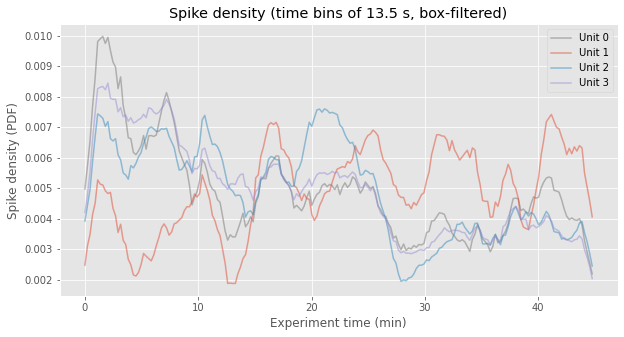

In [11]:
ts_bins = np.linspace(0, last_ts, 201)

for unit, group in df.groupby('unit'):
    color = colors[unit]
    plt.plot(
        ts_bins[:-1] / (60 * sampling_rate),
        np.convolve(
            (ts_bins[1] - ts_bins[0]) * np.histogram(group["timestamp"], bins=ts_bins, density=True)[0],
            np.ones(10) / 10,
            mode='same'
        ),
        color=color, alpha=0.5,
        label=f"Unit {unit}"
    )
plt.xlabel(r'Experiment time (min)')
plt.ylabel(r'Spike density (PDF)')
plt.title(fr'Spike density (time bins of {(ts_bins[1] - ts_bins[0]) / sampling_rate:.1f} s, box-filtered)')
plt.legend();

## Peak/valley-related features

Start with boolean arrays indicating wether a waveform sample is a local minimum or maximum:

In [29]:
is_local_min = np.zeros(wfs_up.shape, dtype=bool)
is_local_max = np.zeros(wfs_up.shape, dtype=bool)

is_local_min[argrelmin(wfs_up, axis=1)] = True
is_local_max[argrelmax(wfs_up, axis=1)] = True

is_local_min, is_local_max

(array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ...,  True, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]))

Then, look for local minima lesser than the spike threshold (valleys) and positive local maxima (peaks), skipping points before threshold crossing.

In [30]:
skip = np.argmin(np.abs(ticks_up - pre_threshold)) + 1

is_valley = is_local_min & (wfs_up < threshold)
is_valley[:, :skip] = False

is_peak = is_local_max & (wfs_up > 0)
is_peak[:, :skip] = False

is_valley, is_peak

(array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]))

These masks can be used to do all peak/valley-related information.

### Peak/valley count

valley_count  peak_count
0                  2           5
1                  1           0
2                  1           4
3                  1           5
4                  1           2
...              ...         ...
137982             2           3
137983             0           1
137984             0           2
137985             0           3
137986             1           1

[137987 rows x 2 columns]

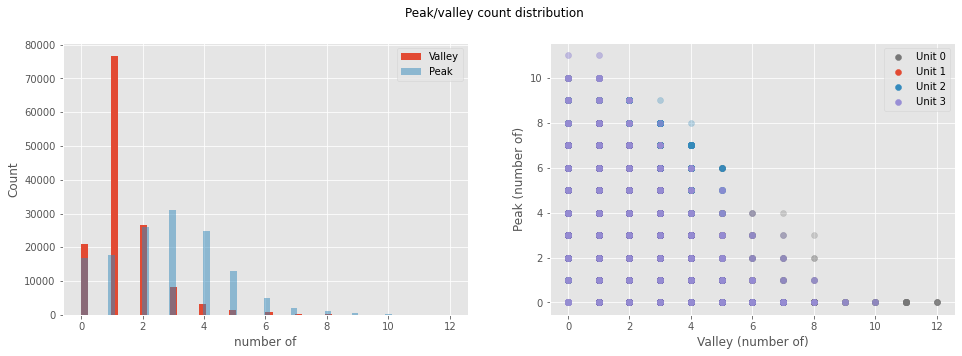

In [31]:
valley_count = np.sum(is_valley, axis=1)
peak_count = np.sum(is_peak, axis=1)

df['valley_count'] = valley_count
df['peak_count'] = peak_count

plot_peak_valley_features(
    df,
    title='Peak/valley count distribution',
    unit=r"number of",
    suffix='_count'
)
df[['valley_count', 'peak_count']]

### Peak/valley tick

**Note:** waveforms were upsampled, therefore peak/valley ticks can be fractional.

valley_tick  peak_tick
0             8.500     16.375
1             8.250        NaN
2             9.375     18.125
3             9.875     17.125
4             8.625     24.125
...             ...        ...
137982       10.875     21.000
137983          NaN     17.125
137984          NaN     27.000
137985          NaN     24.875
137986        8.125     24.250

[137987 rows x 2 columns]

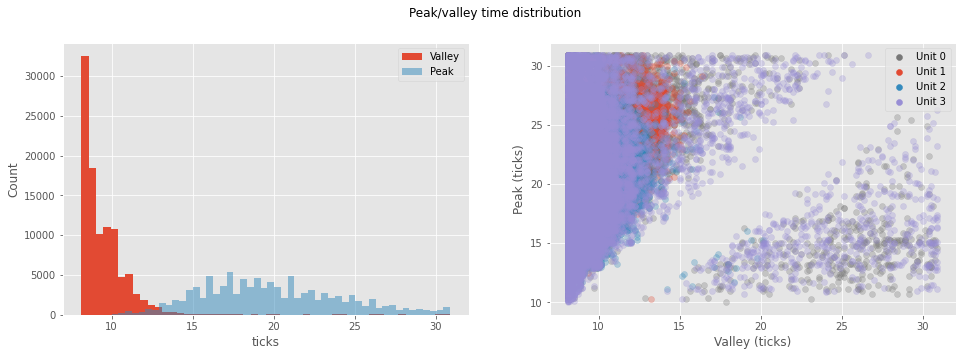

In [32]:
has_valley = np.any(is_valley, axis=1)
has_peak = np.any(is_peak, axis=1)

valley_ticks = np.argmax(is_valley, axis=1)
peak_ticks = np.argmax(is_peak, axis=1)

df.loc[has_valley, 'valley_tick'] = ticks_up[valley_ticks[has_valley]]
df.loc[has_peak, 'peak_tick'] = ticks_up[peak_ticks[has_peak]]

plot_peak_valley_features(
    df[['unit', 'valley_tick', 'peak_tick']].dropna(),
    title='Peak/valley time distribution',
    unit=r"ticks",
    suffix='_tick'
)
df[['valley_tick', 'peak_tick']]

### Peak/valley

valley      peak
0      -0.000050  0.000026
1      -0.000033       NaN
2      -0.000076  0.000022
3      -0.000040  0.000005
4      -0.000039  0.000023
...          ...       ...
137982 -0.000053  0.000027
137983       NaN  0.000002
137984       NaN  0.000007
137985       NaN  0.000005
137986 -0.000033  0.000001

[137987 rows x 2 columns]

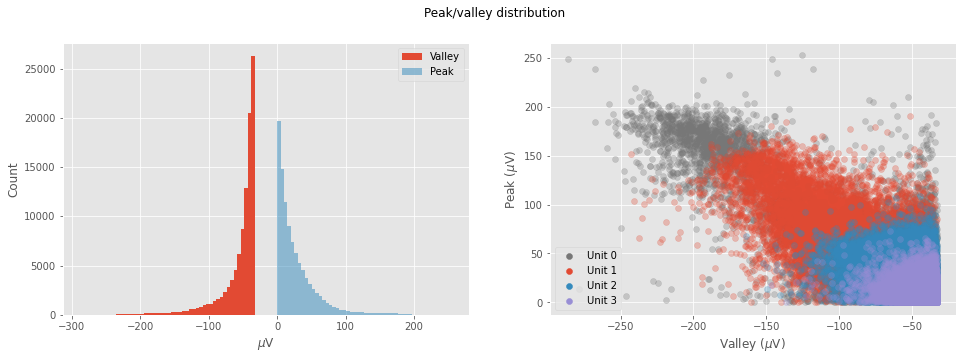

In [34]:
I = np.arange(len(wfs_up))

valley = wfs_up[I, valley_ticks]
peak = wfs_up[I, peak_ticks]

df.loc[has_valley, 'valley'] = valley[has_valley]
df.loc[has_peak, 'peak'] = peak[has_peak]

plot_peak_valley_features(
    df[['unit', 'valley', 'peak']].dropna(),
    title='Peak/valley distribution',
    scale=1e6,
    unit=r'$\mu$V',
)
df[['valley', 'peak']]

### Peak/valley FWHM

In [49]:
J, I = np.meshgrid(np.arange(wf_samples_up), np.arange(n_points))

In [58]:
? np.take

In [60]:
np.take(wfs_up, [0, 1, 2], axis=1).shape

(137987, 3)

In [64]:
(wf <= 0.5 * valley[0]) & ((wf[:-1] < wf[1:]))

ValueError: operands could not be broadcast together with shapes (249,) (248,) 

In [75]:
J = np.arange(wf_samples_up)
# ((J[:-1] <= valley_ticks[0]) & (wf[:-1] <= wf[1:])) | ((J[1:] >= valley_ticks[0]) & (wf[1:] >= wf[:-1]))

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [57]:
(
    (wfs_up <= 0.5 * valley[:, np.newaxis])
    & (
        (J <= valley_ticks[:, np.newaxis])
        & np.take(wfs_up[I], J+1) <= np.take(wfs_up[I], J)
    )
)[0]

MemoryError: Unable to allocate 63.7 GiB for an array with shape (137987, 249, 249) and data type float64

valley_fwhm  peak_fwhm
0             5.000     17.500
1            11.875        NaN
2             5.625     14.125
3             6.500      8.500
4            14.500      9.000
...             ...        ...
137982        8.375     12.375
137983          NaN      4.500
137984          NaN      1.125
137985          NaN      2.375
137986       15.250      2.750

[137987 rows x 2 columns]

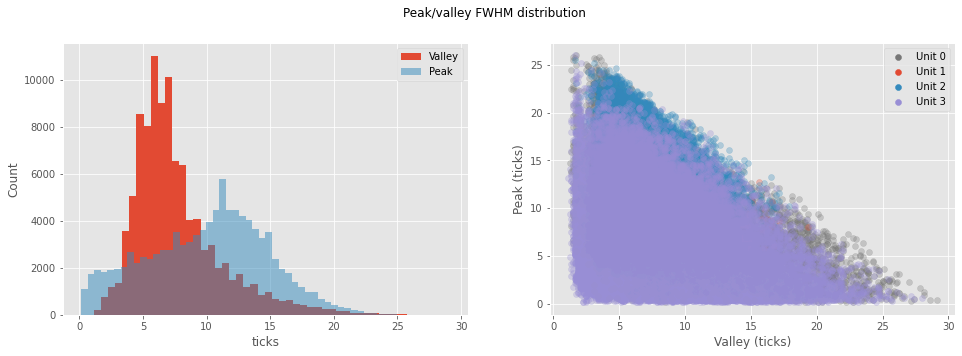

In [15]:
valley_fwhm = np.take(ticks_up, np.sum(wfs_up <= 0.5 * valley[:, np.newaxis], axis=1), mode='clip')
peak_fwhm = np.take(ticks_up, np.sum(wfs_up >= 0.5 * peak[:, np.newaxis], axis=1), mode='clip')

df.loc[has_valley, 'valley_fwhm'] = valley_fwhm[has_valley]
df.loc[has_peak, 'peak_fwhm'] = peak_fwhm[has_peak]

plot_peak_valley_features(
    df[['unit', 'valley_fwhm', 'peak_fwhm']].dropna(),
    title='Peak/valley FWHM distribution',
    unit=r"ticks",
    suffix='_fwhm'
)
df[['valley_fwhm', 'peak_fwhm']]

### Differences

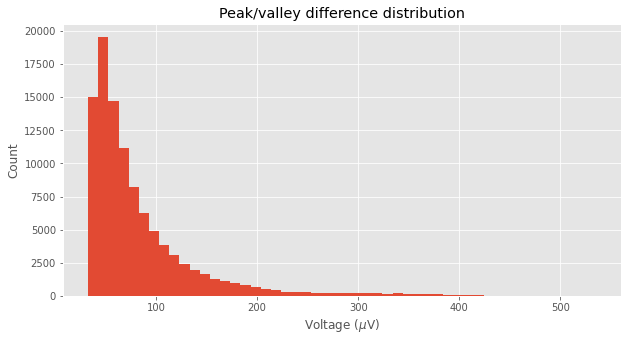

In [16]:
plt.hist(1e6 * (df['peak'] - df['valley']), bins=50)
plt.title('Peak/valley difference distribution')
plt.xlabel('Voltage ($\mu$V)')
plt.ylabel('Count');

In [17]:
plt.hist(df['peak_tick'] - df['valley_tick'], bins=50)
plt.title('Peak-valley distance distribution')
plt.xlabel('Time (ticks)')
plt.ylabel('Count');

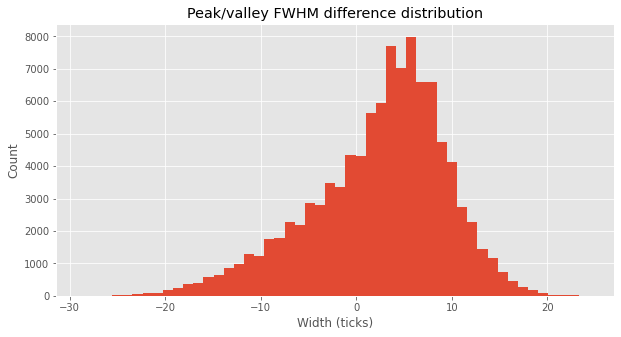

In [18]:
plt.hist(df['peak_fwhm'] - df['valley_fwhm'], bins=50)
plt.title('Peak/valley FWHM difference distribution')
plt.xlabel('Width (ticks)')
plt.ylabel('Count');

### Summary

In [19]:
df[['valley_count', 'peak_count', 'valley', 'peak', 'valley_tick', 'peak_tick', 'valley_fwhm', 'peak_fwhm']]

valley_count  peak_count    valley      peak  valley_tick  peak_tick  \
0                  2           5 -0.000050  0.000026        8.500     16.375   
1                  1           0 -0.000033       NaN        8.250        NaN   
2                  1           4 -0.000076  0.000022        9.375     18.125   
3                  1           5 -0.000040  0.000005        9.875     17.125   
4                  1           2 -0.000039  0.000023        8.625     24.125   
...              ...         ...       ...       ...          ...        ...   
137982             2           3 -0.000053  0.000027       10.875     21.000   
137983             0           1       NaN  0.000002          NaN     17.125   
137984             0           2       NaN  0.000007          NaN     27.000   
137985             0           3       NaN  0.000005          NaN     24.875   
137986             1           1 -0.000033  0.000001        8.125     24.250   

        valley_fwhm  peak_fwhm  
0             5.000     17.500  
1            11.875        NaN  
2             5.625     14.125  
3             6.500      8.500  
4            14.500      9.000  
...             ...        ...  
137982        8.375     12.375  
137983          NaN      4.500  
137984          NaN      1.125  
137985          NaN      2.375  
137986       15.250      2.750  

[137987 rows x 8 columns]

## Area and energy

In [20]:
df['area']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
137982   NaN
137983   NaN
137984   NaN
137985   NaN
137986   NaN
Name: area, Length: 137987, dtype: float64

In [21]:
df['area'] = np.sum(np.abs(wfs_up), axis=1) / sampling_rate
df['energy'] = np.sum(wfs_up**2, axis=1) / sampling_rate
df['nl_energy'] = df['energy'] - np.sum(wfs_up[:,:-2] * wfs_up[:,2:], axis=1) / sampling_rate

df[['area', 'energy', 'nl_energy']]

area        energy     nl_energy
0       1.699065e-07  5.744383e-12  5.645434e-14
1       9.099933e-08  1.823436e-12  5.903001e-15
2       1.795267e-07  7.628466e-12  3.781835e-14
3       7.689709e-08  1.583958e-12  3.186616e-14
4       1.337775e-07  3.304028e-12  2.501167e-14
...              ...           ...           ...
137982  1.711956e-07  6.322946e-12  6.413538e-14
137983  6.565739e-08  9.982509e-13  1.326417e-14
137984  5.903529e-08  9.971979e-13  1.066117e-14
137985  4.919870e-08  6.409945e-13  9.408813e-15
137986  9.312006e-08  1.783994e-12  1.466652e-14

[137987 rows x 3 columns]

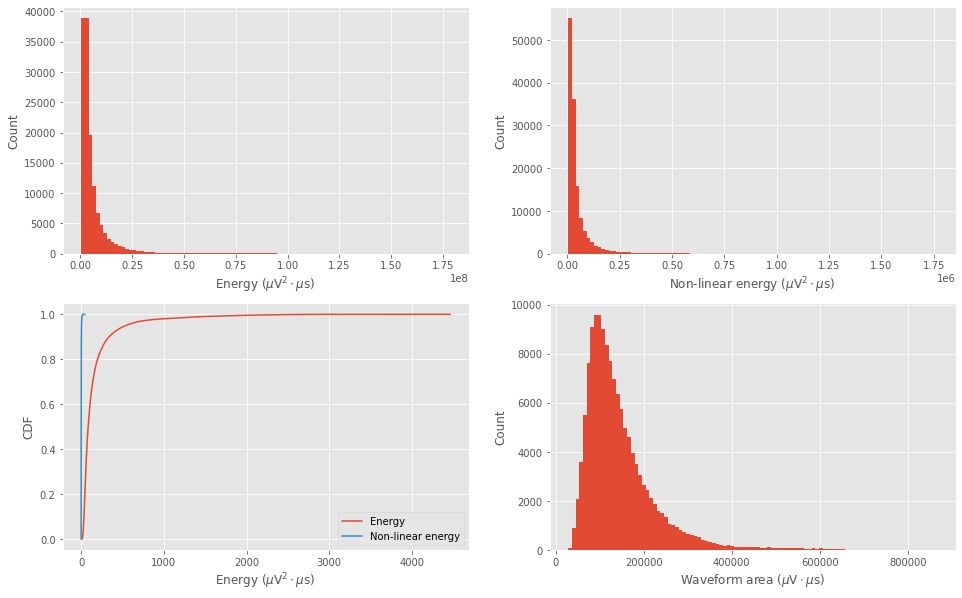

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
en_ax = axes[0][0]
nl_ax = axes[0][1]
ee_ax = axes[1][0]
ar_ax = axes[1][1]

en_ax.hist(1e18 * df['energy'], bins=100)
en_ax.set_xlabel(r'Energy ($\mu{\rm V}^2 \cdot \mu{\rm s}$)')
en_ax.set_ylabel('Count')

nl_ax.hist(1e18 * df['nl_energy'], bins=100)
nl_ax.set_xlabel(r'Non-linear energy ($\mu{\rm V}^2 \cdot \mu{\rm s}$)')
nl_ax.set_ylabel('Count')

ar_ax.hist(1e12 * df['area'], bins=100)
ar_ax.set_xlabel(r'Waveform area ($\mu{\rm V} \cdot \mu{\rm s}$)')
ar_ax.set_ylabel('Count')

y, x = np.histogram(1e18 * df['energy'], density=True, bins=1000)
ee_ax.plot(x[1:] / sampling_rate, np.cumsum(y) * (x[1] - x[0]), label='Energy')
y, x = np.histogram(1e18 * df['nl_energy'], density=True, bins=1000)
ee_ax.plot(x[1:] / sampling_rate, np.cumsum(y) * (x[1] - x[0]), label='Non-linear energy')
ee_ax.set_xlabel(r'Energy ($\mu{\rm V}^2 \cdot \mu{\rm s}$)')
ee_ax.set_ylabel('CDF')
ee_ax.legend()

plt.show()

### Joint distributions

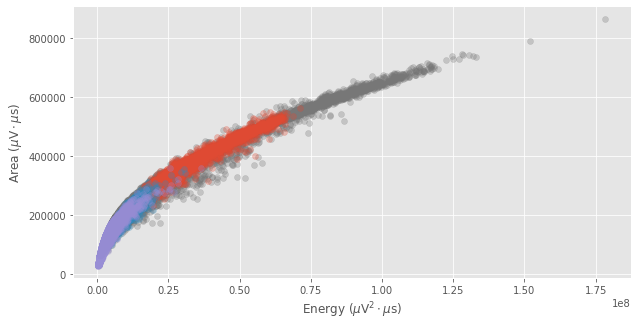

In [23]:
for unit, group in df.groupby('unit'):
    color = f"C{[3, 0, 1, 2, 4][unit]}"
    plt.scatter(1e18 * group['energy'], 1e12 * group['area'], color=color, alpha=0.3)
    plt.xlabel(r'Energy ($\mu{\rm V}^2 \cdot \mu{\rm s}$)')
    plt.ylabel(r'Area ($\mu{\rm V} \cdot \mu{\rm s}$)')

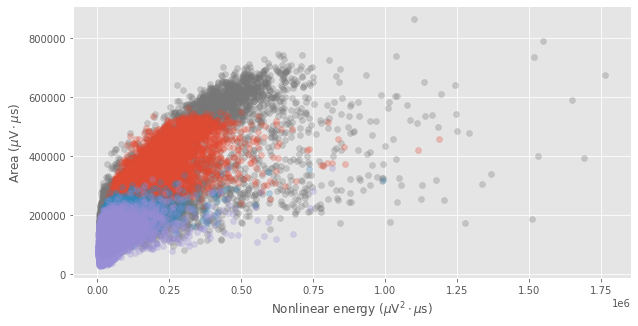

In [24]:
for unit, group in df.groupby('unit'):
    color = f"C{[3, 0, 1, 2, 4][unit]}"
    plt.scatter(1e18 * group['nl_energy'], 1e12 * group['area'], color=color, alpha=0.3)
    plt.xlabel(r'Nonlinear energy ($\mu{\rm V}^2 \cdot \mu{\rm s}$)')
    plt.ylabel(r'Area ($\mu{\rm V} \cdot \mu{\rm s}$)')

## ISI

In [25]:
timestamp_isi = ts[1:] - ts[:-1]
df.loc[1:, 'isi_prev'] = df.loc[:df.index[-2], 'isi_next'] = timestamp_isi

df[['isi_prev', 'isi_next']]

isi_prev  isi_next
0           <NA>        66
1             66      1018
2           1018       963
3            963      2676
4           2676       179
...          ...       ...
137982       444      7464
137983      7464      2529
137984      2529      5337
137985      5337     13853
137986     13853      <NA>

[137987 rows x 2 columns]

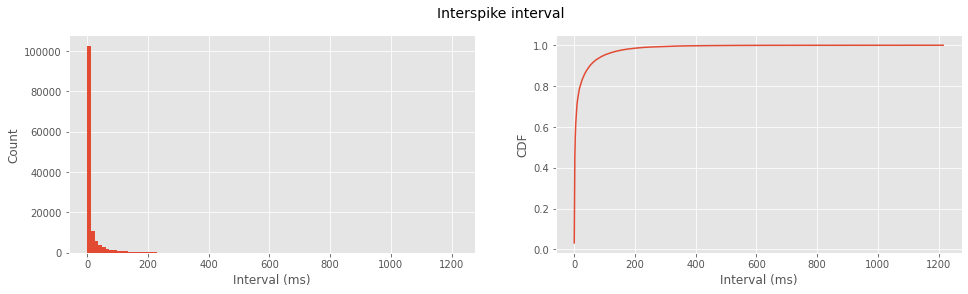

In [26]:
fig, (ax_hist, ax_cdf) = plt.subplots(1, 2, figsize=(16, 4))

mask = Ellipsis
ax_hist.hist(1e3 * timestamp_isi[mask] / sampling_rate, bins=100)
ax_hist.set_xlabel('Interval (ms)')
ax_hist.set_ylabel('Count')

y, x = np.histogram(timestamp_isi, bins=10000, density=True)
ax_cdf.plot(1e3 * x[1:] / sampling_rate, np.cumsum(y) * (x[1] - x[0]))
ax_cdf.set_xlabel('Interval (ms)')
ax_cdf.set_ylabel('CDF')

fig.suptitle('Interspike interval', fontsize=14)

plt.show()

## Save data

In [27]:
df['peak-valley'] = df['peak'] - df['valley']
df['peak_tick-valley_tick'] = df['peak_tick'] - df['valley_tick']

df.to_csv(f"data/{data_name}_{channel}.omniplex.csv", index=False)

df

timestamp  unit    valley      peak  valley_fwhm  peak_fwhm  \
0            2300     2 -0.000050  0.000026        5.000     17.500   
1            2366     3 -0.000033       NaN       11.875        NaN   
2            3384     2 -0.000076  0.000022        5.625     14.125   
3            4347     3 -0.000040  0.000005        6.500      8.500   
4            7023     3 -0.000039  0.000023       14.500      9.000   
...           ...   ...       ...       ...          ...        ...   
137982  107940880     2 -0.000053  0.000027        8.375     12.375   
137983  107948344     3       NaN  0.000002          NaN      4.500   
137984  107950873     3       NaN  0.000007          NaN      1.125   
137985  107956210     3       NaN  0.000005          NaN      2.375   
137986  107970063     3 -0.000033  0.000001       15.250      2.750   

        valley_tick  peak_tick  valley_count  peak_count          area  \
0             8.500     16.375             2           5  1.699065e-07   
1             8.250        NaN             1           0  9.099933e-08   
2             9.375     18.125             1           4  1.795267e-07   
3             9.875     17.125             1           5  7.689709e-08   
4             8.625     24.125             1           2  1.337775e-07   
...             ...        ...           ...         ...           ...   
137982       10.875     21.000             2           3  1.711956e-07   
137983          NaN     17.125             0           1  6.565739e-08   
137984          NaN     27.000             0           2  5.903529e-08   
137985          NaN     24.875             0           3  4.919870e-08   
137986        8.125     24.250             1           1  9.312006e-08   

              energy     nl_energy  isi_prev  isi_next      wf_0      wf_1  \
0       5.744383e-12  5.645434e-14      <NA>        66  0.000014  0.000013   
1       1.823436e-12  5.903001e-15        66      1018 -0.000002  0.000002   
2       7.628466e-12  3.781835e-14      1018       963  0.000006  0.000004   
3       1.583958e-12  3.186616e-14       963      2676  0.000002  0.000009   
4       3.304028e-12  2.501167e-14      2676       179 -0.000016 -0.000027   
...              ...           ...       ...       ...       ...       ...   
137982  6.322946e-12  6.413538e-14       444      7464 -0.000002  0.000006   
137983  9.982509e-13  1.326417e-14      7464      2529  0.000007  0.000008   
137984  9.971979e-13  1.066117e-14      2529      5337  0.000004 -0.000008   
137985  6.409945e-13  9.408813e-15      5337     13853 -0.000004 -0.000005   
137986  1.783994e-12  1.466652e-14     13853      <NA> -0.000016 -0.000012   

            wf_2      wf_3          wf_4      wf_5      wf_6      wf_7  \
0       0.000009  0.000013  1.199722e-05  0.000006  0.000001 -0.000023   
1       0.000003 -0.000001 -1.160622e-05 -0.000008 -0.000015 -0.000027   
2       0.000002 -0.000004 -7.429123e-06 -0.000017 -0.000018 -0.000028   
3       0.000002  0.000010 -8.468628e-06 -0.000008 -0.000028 -0.000025   
4      -0.000026 -0.000022 -2.554893e-05 -0.000024 -0.000026 -0.000024   
...          ...       ...           ...       ...       ...       ...   
137982  0.000004  0.000009  1.144409e-06 -0.000003 -0.000015 -0.000028   
137983  0.000003  0.000002 -9.536743e-08 -0.000010 -0.000016 -0.000023   
137984 -0.000014 -0.000006 -1.527786e-05 -0.000006 -0.000011 -0.000030   
137985 -0.000006 -0.000007 -9.403229e-06 -0.000011 -0.000008 -0.000022   
137986 -0.000016 -0.000019 -1.974106e-05 -0.000018 -0.000009 -0.000020   

            wf_8      wf_9     wf_10     wf_11     wf_12     wf_13     wf_14  \
0      -0.000048 -0.000049 -0.000050 -0.000037 -0.000025 -0.000018 -0.000013   
1      -0.000033 -0.000031 -0.000023 -0.000025 -0.000022 -0.000024 -0.000020   
2      -0.000057 -0.000075 -0.000075 -0.000068 -0.000050 -0.000039 -0.000028   
3      -0.000035 -0.000029 -0.000040 -0.000019 -0.000028 -0.000009 -0.000015   
4      -0.000036 -0.000038 -0.000034 -0.